<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Sultan Fahrezy Syahdwinata Nugraha"
KELAS = "C"
NPM = "2006533811"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = [
    'https://www.statology.org/k-means-clustering-in-python/',
    'https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html',
    'https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html',
    'https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html',
    'https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677',
]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sultan Fahrezy Syahdwinata Nugraha dari kelas C dengan NPM 2006533811, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sultan Fahrezy Syahdwinata Nugraha)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan.

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [ ]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as scp
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from scipy.cluster.hierarchy import dendrogram

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [ ]:
# load dataset
df = pd.read_csv('penguin.csv')

# menampilkan cuplikan dataset
print('\nCuplikan isi data:')
df.head()


Cuplikan isi data:


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [ ]:
# informasi dataset
print('Atribut, jumlah data, tipe data:')
df.info()

total_rows, total_attributes = df.shape
print('\nJumlah data:', total_rows)
print('Jumlah atribut:', total_attributes)

Atribut, jumlah data, tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB

Jumlah data: 344
Jumlah atribut: 6


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [ ]:
# membagi atribut numerik dan kategorikal
numerikal = ['panjang_paruh_atas', 'tebal_paruh_atas', 'panjang_sirip', 'massa_tubuh']
kategorikal = ['pulau_habitat', 'jenis_kelamin']

# menampilkan data numerikal
print('Statistika deskriptif data numerikal')
display(df.describe())

# menampilkan data kategorikal
print('\nStatistika deskriptif data kategorikal')
display(df.describe(include=['object']))

Statistika deskriptif data numerikal


,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000



Statistika deskriptif data kategorikal


,pulau_habitat,jenis_kelamin
count,344,334
unique,3,3
top,Biscoe,MALE
freq,168,168


4. Lakukan penanganan terhadap *missing values* [2]

In [ ]:
# cek missing / error values dari tiap atribut
def cek_missing_values_kategorikal(df, col):
    display(df.groupby(col).size())

print('Mencari tahu jumlah missing values tiap atribut:')
display(df.isnull().sum())

for i in kategorikal:
    print('\nMencari error values atribut ' + i)
    cek_missing_values(df, i)

print('\nAda kemungkinan paling besar 19 row data dengan missing value dan error')

def handle_na(df, col):
    if (df[col].dtypes == "object"):
        values = df[col].mode()[0]
    else:
        values = df[col].mean()
    df[i] = df[col].fillna(values)

# mengganti missing values pada data numerik dengan mean atribut
for i in numerikal:
    handle_na(df, i)

# mengganti missing values pada data kategorikal dengan modus atribut
for i in kategorikal:
    handle_na(df, i)

# mengganti value . pada jenis_kelamin
df['jenis_kelamin'] = df['jenis_kelamin'].replace('.', df['jenis_kelamin'].mode()[0])

print('\nMelihat jumlah missing values setelah dihandle:')
display(df.isnull().sum())

Mencari tahu jumlah missing values tiap atribut:


pulau_habitat          0
panjang_paruh_atas     2
tebal_paruh_atas       2
panjang_sirip          2
massa_tubuh            2
jenis_kelamin         10
dtype: int64


Mencari error values atribut pulau_habitat


pulau_habitat
Biscoe       168
Dream        124
Torgersen     52
dtype: int64


Mencari error values atribut jenis_kelamin


jenis_kelamin
.           1
FEMALE    165
MALE      168
dtype: int64


Ada kemungkinan paling besar 19 row data dengan missing value dan error

Melihat jumlah missing values setelah dihandle:


pulau_habitat         0
panjang_paruh_atas    0
tebal_paruh_atas      0
panjang_sirip         0
massa_tubuh           0
jenis_kelamin         0
dtype: int64

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]


Visualisasi untuk column panjang_paruh_atas


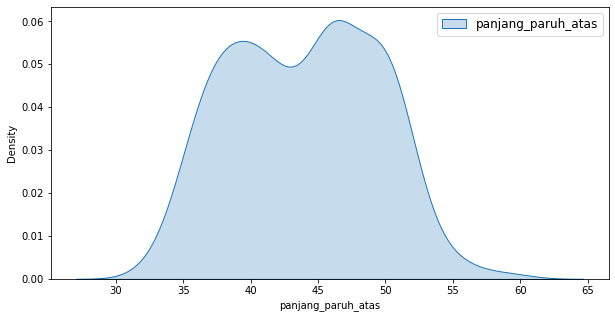


Visualisasi untuk column tebal_paruh_atas


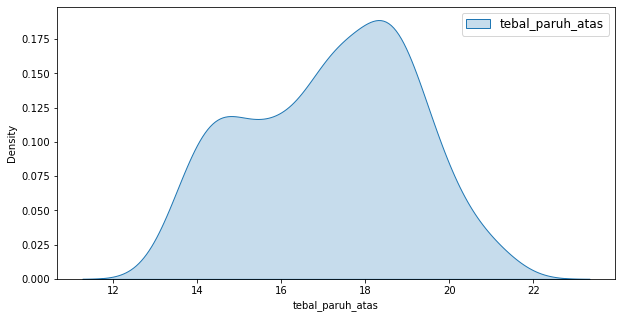


Visualisasi untuk column panjang_sirip


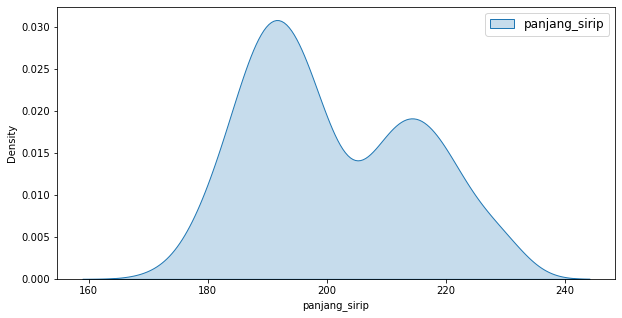


Visualisasi untuk column massa_tubuh


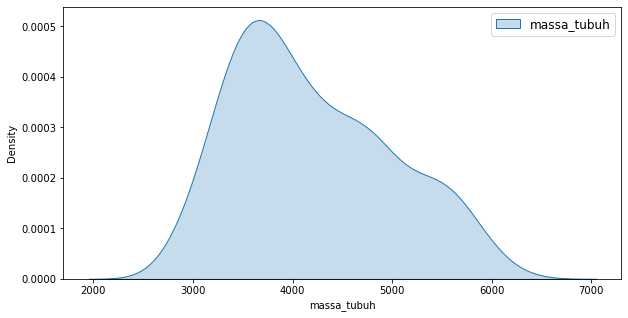

In [ ]:
# melakukan visualisasi distribusi data
# jika numerikal maka menggunakan central tendency plot dan jika kategorikal maka menggunakan bar plot
def visualisasi_distribusi(df, col):
    if (df[col].dtypes != "object"):
        col_name = col
        col = df[col]
        stats = [
            ['Mean', np.mean(col)],
            ['Median', np.median(col)],
            ['Mode', scp.mode(col)[0][0]],
            ['Standard Deviation', np.std(col)],
            ['Variance', np.var(col)],
            ['Minimum', np.min(col)],
            ['Maximum', np.max(col)],
        ]
        plt.figure(figsize=(10,5))
        plt.yticks(size=10)
        sns.kdeplot(col, shade=True)
        print('\nVisualisasi untuk column ' + i)
        plt.legend([col_name, 'Mean', 'Median', 'Mode'], fontsize=12)
        plt.show()

# melakukan visualisasi
for i in numerikal:
    visualisasi_distribusi(df, i)

Visualisasi pulau_habitat:


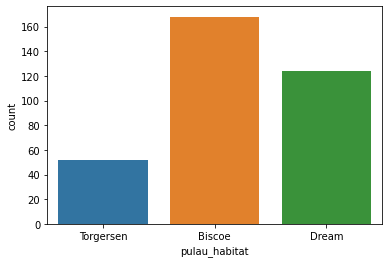

In [ ]:
countplot('pulau_habitat')
print('Visualisasi pulau_habitat:')

Visualisasi jenis_kelamin:


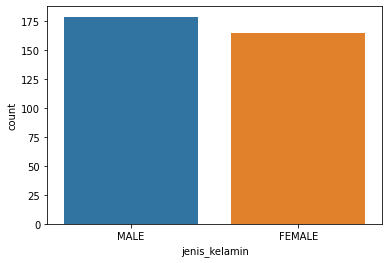

In [ ]:
countplot('jenis_kelamin')
print('Visualisasi jenis_kelamin:')


Pearson correlation antar atribut:


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
pulau_habitat,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.002893
panjang_paruh_atas,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.322338
tebal_paruh_atas,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.354374
panjang_sirip,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.243556
massa_tubuh,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.408210
jenis_kelamin,0.002893,0.322338,0.354374,0.243556,0.408210,1.000000



Visualisasi dengan heatmap:


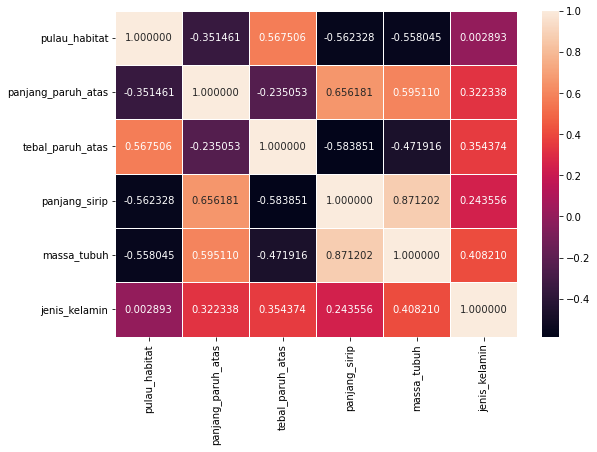

In [ ]:
# mencari korelasi dua buah atribut

# Melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value
df_before_labeled = df.copy()
for c in kategorikal:
    le = LabelEncoder()
    le.fit(list(df[c].values))
    df[c] = le.transform(list(df[c].values))

# korelasi antar atribut
corr = df.corr(method='pearson')
print('\nPearson correlation antar atribut:')
display(corr)

# visualisasi dengan heatmap
f, ax = plt.subplots(figsize=(9, 6))
print('\nVisualisasi dengan heatmap:')
sns.heatmap(corr, annot=True, fmt="f", linewidths=.5, ax=ax)
plt.show()

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

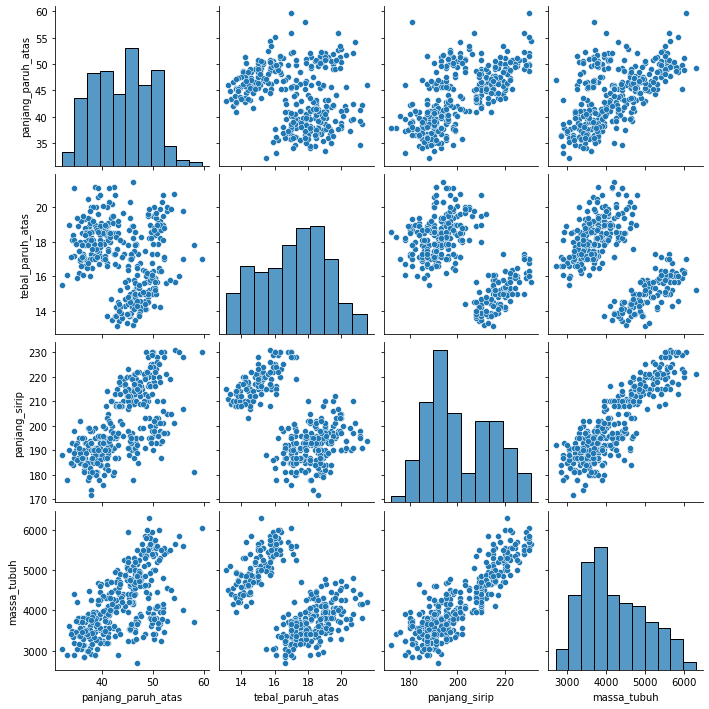

In [ ]:
# 2D plot

df_numerikal = df_before_labeled.drop(['jenis_kelamin', 'pulau_habitat'], axis=1)

sns.pairplot(df_numerikal)

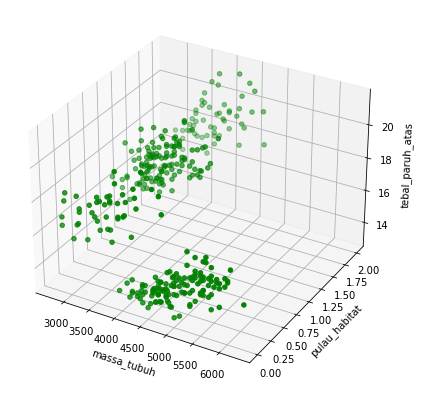

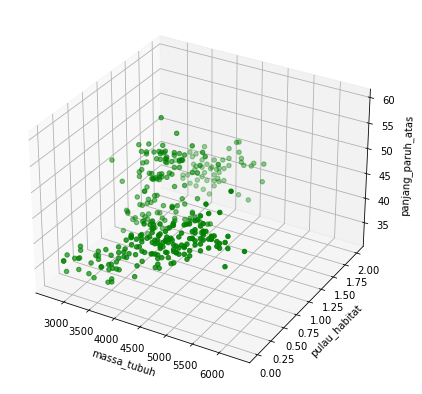

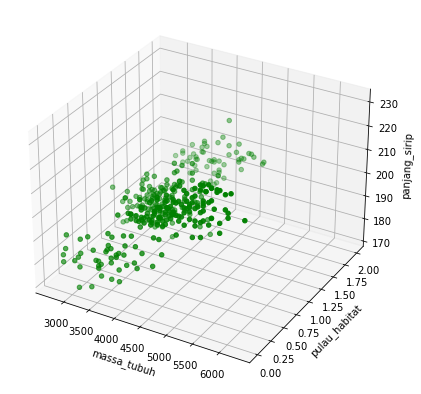

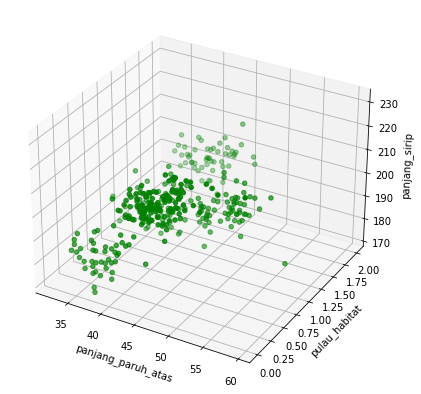

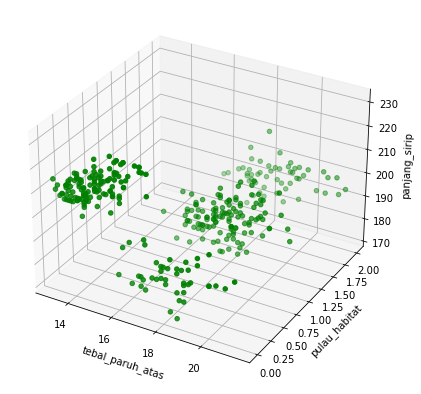

In [ ]:
# 3D plot dengan mempertimbangkan pulau habitat

# 1
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
x = df_before_labeled['massa_tubuh']
y = df['pulau_habitat']
z = df_before_labeled['tebal_paruh_atas']
ax.set_xlabel('massa_tubuh')
ax.set_ylabel('pulau_habitat')
ax.set_zlabel('tebal_paruh_atas')
ax.scatter3D(x, y, z, color = "green")

# 2
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
x = df_before_labeled['massa_tubuh']
y = df['pulau_habitat']
z = df_before_labeled['panjang_paruh_atas']
ax.set_xlabel('massa_tubuh')
ax.set_ylabel('pulau_habitat')
ax.set_zlabel('panjang_paruh_atas')
ax.scatter3D(x, y, z, color = "green")

# 3
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
x = df_before_labeled['massa_tubuh']
y = df['pulau_habitat']
z = df_before_labeled['panjang_sirip']
ax.set_xlabel('massa_tubuh')
ax.set_ylabel('pulau_habitat')
ax.set_zlabel('panjang_sirip')
ax.scatter3D(x, y, z, color = "green")

# 4
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
x = df_before_labeled['panjang_paruh_atas']
y = df['pulau_habitat']
z = df_before_labeled['panjang_sirip']
ax.set_xlabel('panjang_paruh_atas')
ax.set_ylabel('pulau_habitat')
ax.set_zlabel('panjang_sirip')
ax.scatter3D(x, y, z, color = "green")

# 5
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
x = df_before_labeled['tebal_paruh_atas']
y = df['pulau_habitat']
z = df_before_labeled['panjang_sirip']
ax.set_xlabel('tebal_paruh_atas')
ax.set_ylabel('pulau_habitat')
ax.set_zlabel('panjang_sirip')
ax.scatter3D(x, y, z, color = "green")

Telah dilakukan visualisasi dengan scatter plot 2D dan 3D.
Untuk scater plot 2D dipilih kombinasi atribut numerikal.
Sementara untuk scatter plot 3D diberikan tambahan atribut pulau_habitat.

Berdasarkan scatter plot diatas, kita akan mencoba melakukan clustering dengan kombinasi panjang_paruh_atas dan panjang_sirip terlebih dahulu.
Karena kedua atribut tersebut memiliki korelasi (0.6) dan pada saat dibuat scatter plot clustering nya belum terbentuk sehingga cocok untuk kita olah.

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut:
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

9. Visualisasikan klaster yang ada [5]

10. Berikan interpretasi dari klaster yang dihasilkan [5]

For n_clusters = 2 The average silhouette_score is : 0.5712612653565422
For n_clusters = 3 The average silhouette_score is : 0.553301616336975
For n_clusters = 4 The average silhouette_score is : 0.4770064415013854
For n_clusters = 5 The average silhouette_score is : 0.4580992501900243
For n_clusters = 6 The average silhouette_score is : 0.43751152774271623


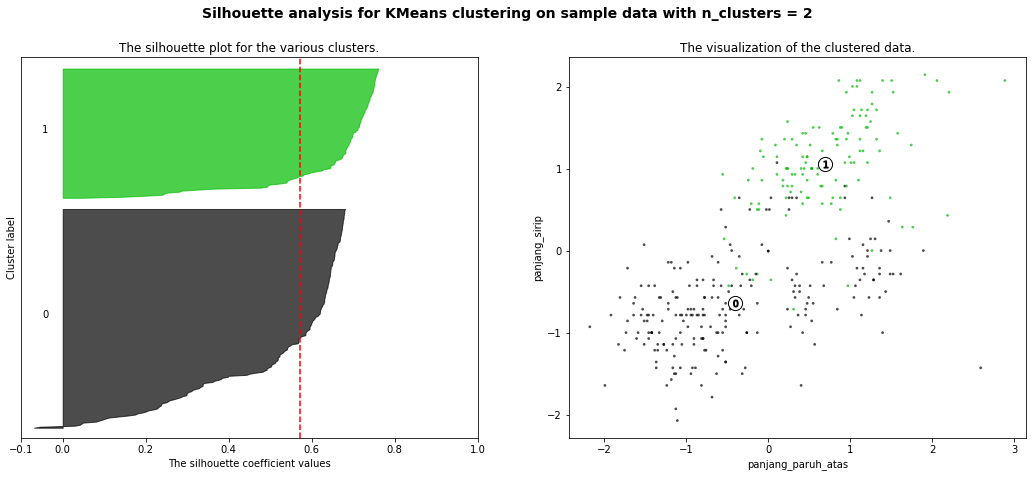

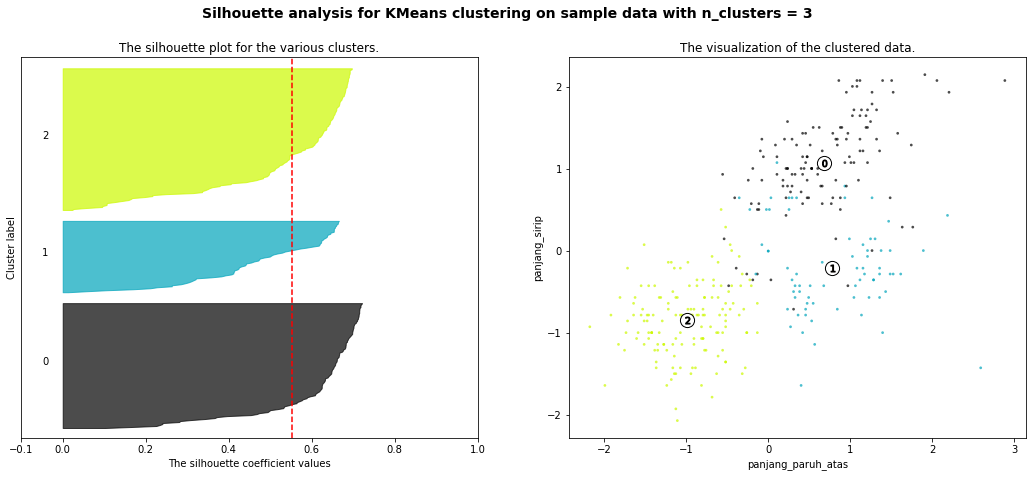

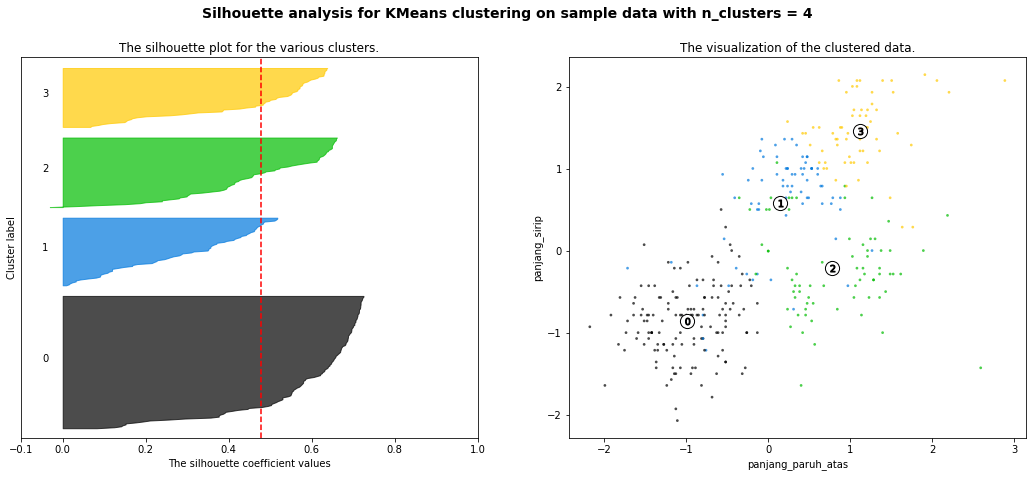

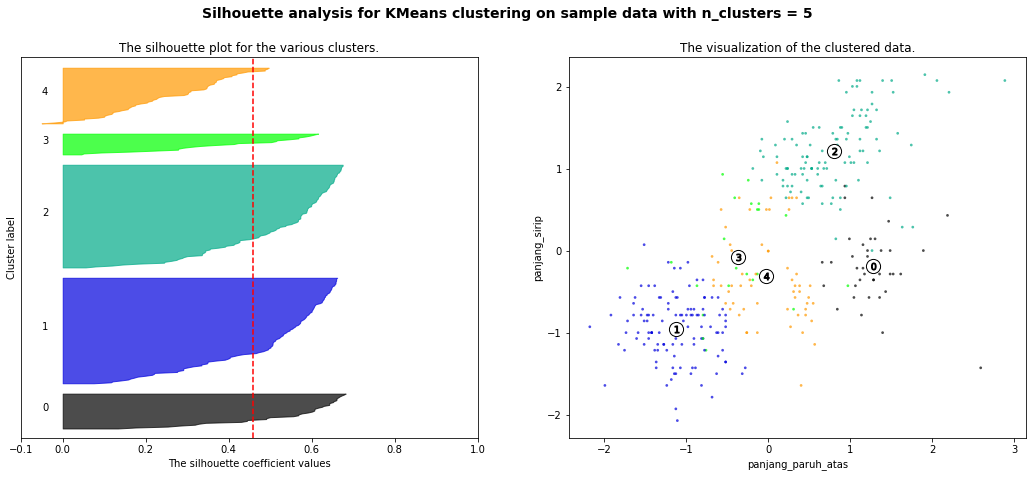

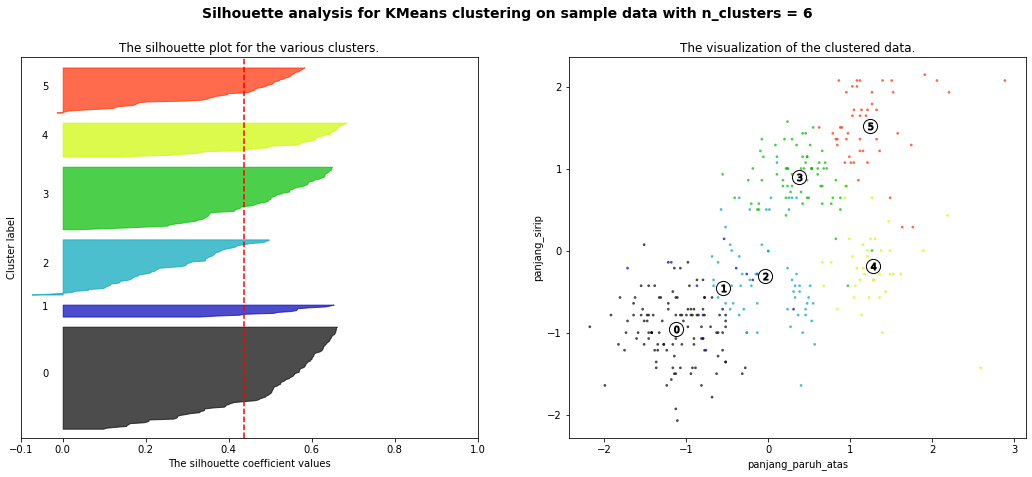

In [ ]:
# Step 1: Tentukan jumlah K dengan bantuan silhouette coefficient

X = scaled_df
y = df_numerikal.columns

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("panjang_paruh_atas")
    ax2.set_ylabel("panjang_sirip")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Maka digunakan K = 2 karena memiliki nilai silhouette coefficient paling tinggi

Visualisasi KMeans


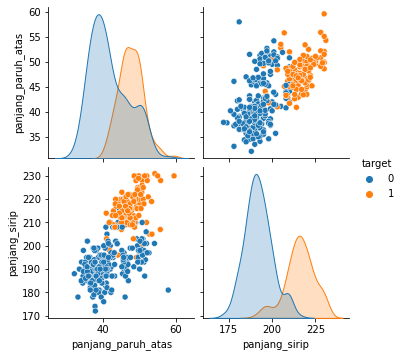

In [ ]:
# menggabungkan atribut
KMean = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
target = KMean.fit_predict(scaled_df)
df_numerikal['target'] = target

sns.pairplot(df_numerikal, hue='target', vars=['panjang_paruh_atas', 'panjang_sirip'])
print("Visualisasi KMeans")

Dilihat dari scatter plot hasil KMeans clustering tersebut terbentuk 2 cluster yang menandakan mungkin ada 2 tipe spesies penguin yang dapat diidentifikasikan berdasarkan panjang sirip dan panjang paruh atasnya.
Berdasarkan clustering tersebut, panjang sirip memiliki peran yang lebih dominan dalam menentukan spesies penguin dimana spesies pertama memiliki panjang sirip dibawah 210 dan spesies kedua memiliki panjang sirip diatas 210.

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini.

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_df)

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

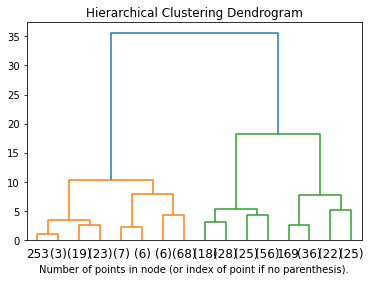

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Ya, sama dengan KMeans sebelumnya yakni 2.

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [ ]:
clustering_2 = AgglomerativeClustering(distance_threshold=None, n_clusters=2).fit(scaled_df)

14. Visualisasikan hasil *clustering assignment* [4]

Visualisasi Agglomerative


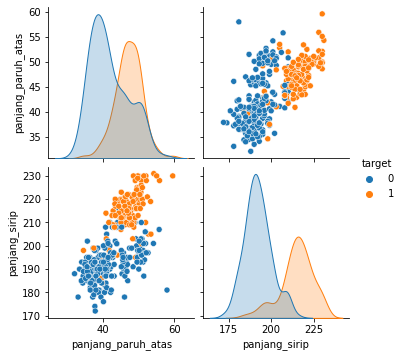

In [ ]:
target = AgglomerativeClustering(distance_threshold=None, n_clusters=2).fit_predict(scaled_df)
df_numerikal['target'] = target

sns.pairplot(df_numerikal, hue='target', vars=['panjang_paruh_atas', 'panjang_sirip'])
print("Visualisasi Agglomerative")

# **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
Kita bisa menggunakan Gower distances yang dapat mengubah data kategorikal menjadi nilai numerik 0 sampai 1.
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
Karena KMeans menggunakan jarak terdekat antara values maka pada akhirnya KMeans akan cenderung mengelompokkan nilai yang dekat secara globular dan menjadikan data yang non globular menjadi globular.
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
Sepertinya jika menggunakan sklearn murni saja hasil yang diberikan akan sama, karena hal yang bisa membuat hasil akhir KMeans berbeda adalah peletakkan centroid awal. Jika KMeans menggunakan sklearn centroid awalnya tetap sama maka tidak akan berubah.
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]
Intra-cluster similarity dihitung dengan mencari jarak antara values pada kelas yang sama sementara inter-cluster dissimilarity dihitung dari jarak antara values yang ada pada kelas-kelas yang berbeda. Klaster dianggap baik apabila intra-cluster similarity nya tinggi dan inter-class similaritynya rendah.